## tf/idf

In [ ]:
# general libraries
import re
import numpy as np
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
from scipy import spatial

# prevent warning
import warnings
warnings.filterwarnings('ignore')

# visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# dimensionality reduction libraries
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# ML models and metrics
from sklearn.cluster import KMeans


# nlp libraries
import nltk
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download("wordnet")
nltk.download('stopwords')




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rezas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rezas\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rezas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rezas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## GloVe

In [ ]:
# Download glove Embedding
import urllib.request
import os

url = 'https://huggingface.co/stanfordnlp/glove/resolve/main/glove.6B.zip'
output = os.path.join(os.getcwd(), 'glove.6B.zip')  # Save to the current working directory

urllib.request.urlretrieve(url, output)


('c:\\Users\\rezas\\OneDrive\\Desktop\\WE\\glove.42B.300d.zip',
 <http.client.HTTPMessage at 0x19844b991d0>)

In [ ]:
import zipfile

# Unzip the file
with zipfile.ZipFile('./glove.6B.zip', 'r') as zip_ref:
    zip_ref.extractall('./glove')

In [ ]:
with open('./glove/glove.6B.300d.txt', encoding='utf-8') as f:
    glove_embedding = {}
    for line in f:
        values = line.split()
        word = values[0]
        vec = np.asarray(values[1:], dtype="float32")
        glove_embedding[word] = vec
    f.close()



In [ ]:
list(glove_embedding.keys()).index("queen")

2060

In [ ]:
glove_embedding["man"]

array([-0.29784  , -0.13255  , -0.14505  , -0.22752  , -0.027429 ,
        0.11005  , -0.039245 , -0.0089607, -0.18866  , -1.1213   ,
        0.34793  , -0.30056  , -0.50103  , -0.031383 , -0.032185 ,
        0.018318 , -0.090429 , -0.14427  , -0.14306  , -0.057477 ,
       -0.020931 ,  0.56276  , -0.018557 ,  0.15168  , -0.25586  ,
       -0.081564 ,  0.2803   , -0.10585  , -0.16777  ,  0.21814  ,
       -0.11845  ,  0.56475  , -0.12645  , -0.062461 , -0.68043  ,
        0.10507  ,  0.24793  , -0.20249  , -0.30726  ,  0.42815  ,
        0.38378  , -0.19371  , -0.075951 , -0.058287 , -0.067195 ,
        0.2192   ,  0.56116  , -0.28156  , -0.13705  ,  0.45754  ,
       -0.14671  , -0.18562  , -0.074146 ,  0.60737  ,  0.07952  ,
        0.41023  ,  0.18377  , -0.08532  ,  0.43795  , -0.34727  ,
        0.2077   ,  0.50454  ,  0.40244  ,  0.1095   , -0.48078  ,
       -0.22372  , -0.54619  , -0.20782  ,  0.13751  , -0.16206  ,
       -0.24835  ,  0.17124  ,  0.037355 ,  0.14547  , -0.0562

In [ ]:

# Define a function to find the closest words in the embedding space using Euclidean distance.
def find_closest_embeddings(embedding):
    return sorted(glove_embedding.keys(), key=lambda word: spatial.distance.euclidean(glove_embedding[word], embedding))



In [ ]:
# Find the closest embeddings for the vector representation of queen - woman + man, which typically results in "king".
find_closest_embeddings(glove_embedding['queen']-glove_embedding['woman']+glove_embedding['man'])[:4]

['queen', 'king', 'majesty', 'monarch']

In [ ]:

# Create separate lists for the words and their corresponding vectors from the GloVe embeddings.
glove_words = list(glove_embedding.keys())[299:2500]
glove_vectors = list(glove_embedding.values())[299:2500]

# Make a dictionary includes above words as keys and their embedding vector as values
glove_embedding = {glove_words[i]:glove_vectors[i] for i in range(len(glove_words))}

In [ ]:

# A k-means clustering method on word embeddings to cluster them into 15 categories
kmeans = KMeans(n_clusters=15)
kmeans.fit(glove_vectors)
labels = kmeans.labels_

In [ ]:


# A PCA to reduce glove vectors to 3D
pca = PCA(n_components=3)
vectors_3d = pca.fit_transform(glove_vectors)

# A PCA to reduce glove vectors to 2D
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(glove_vectors)

In [ ]:
import plotly.express as px
import pandas as pd

# Create a DataFrame for the 3D vectors, labels, and words
df = pd.DataFrame({
    'x': vectors_3d[200:500, 0],
    'y': vectors_3d[200:500, 1],
    'z': vectors_3d[200:500, 2],
    'label': labels[200:500],
    'word': glove_words[200:500]
})

# Create a 3D scatter plot using Plotly
fig = px.scatter_3d(df, x='x', y='y', z='z', color='label', text='word',
                    hover_data={'word': True, 'label': True})

fig.update_traces(marker=dict(size=3))

# Update the layout for better visualization
fig.update_layout(
    title='3D Visualization of GloVe Embeddings with Tooltips',
    scene=dict(
        xaxis_title='PCA Component 1',
        yaxis_title='PCA Component 2',
        zaxis_title='PCA Component 3'
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

# Show the plot
fig.show()


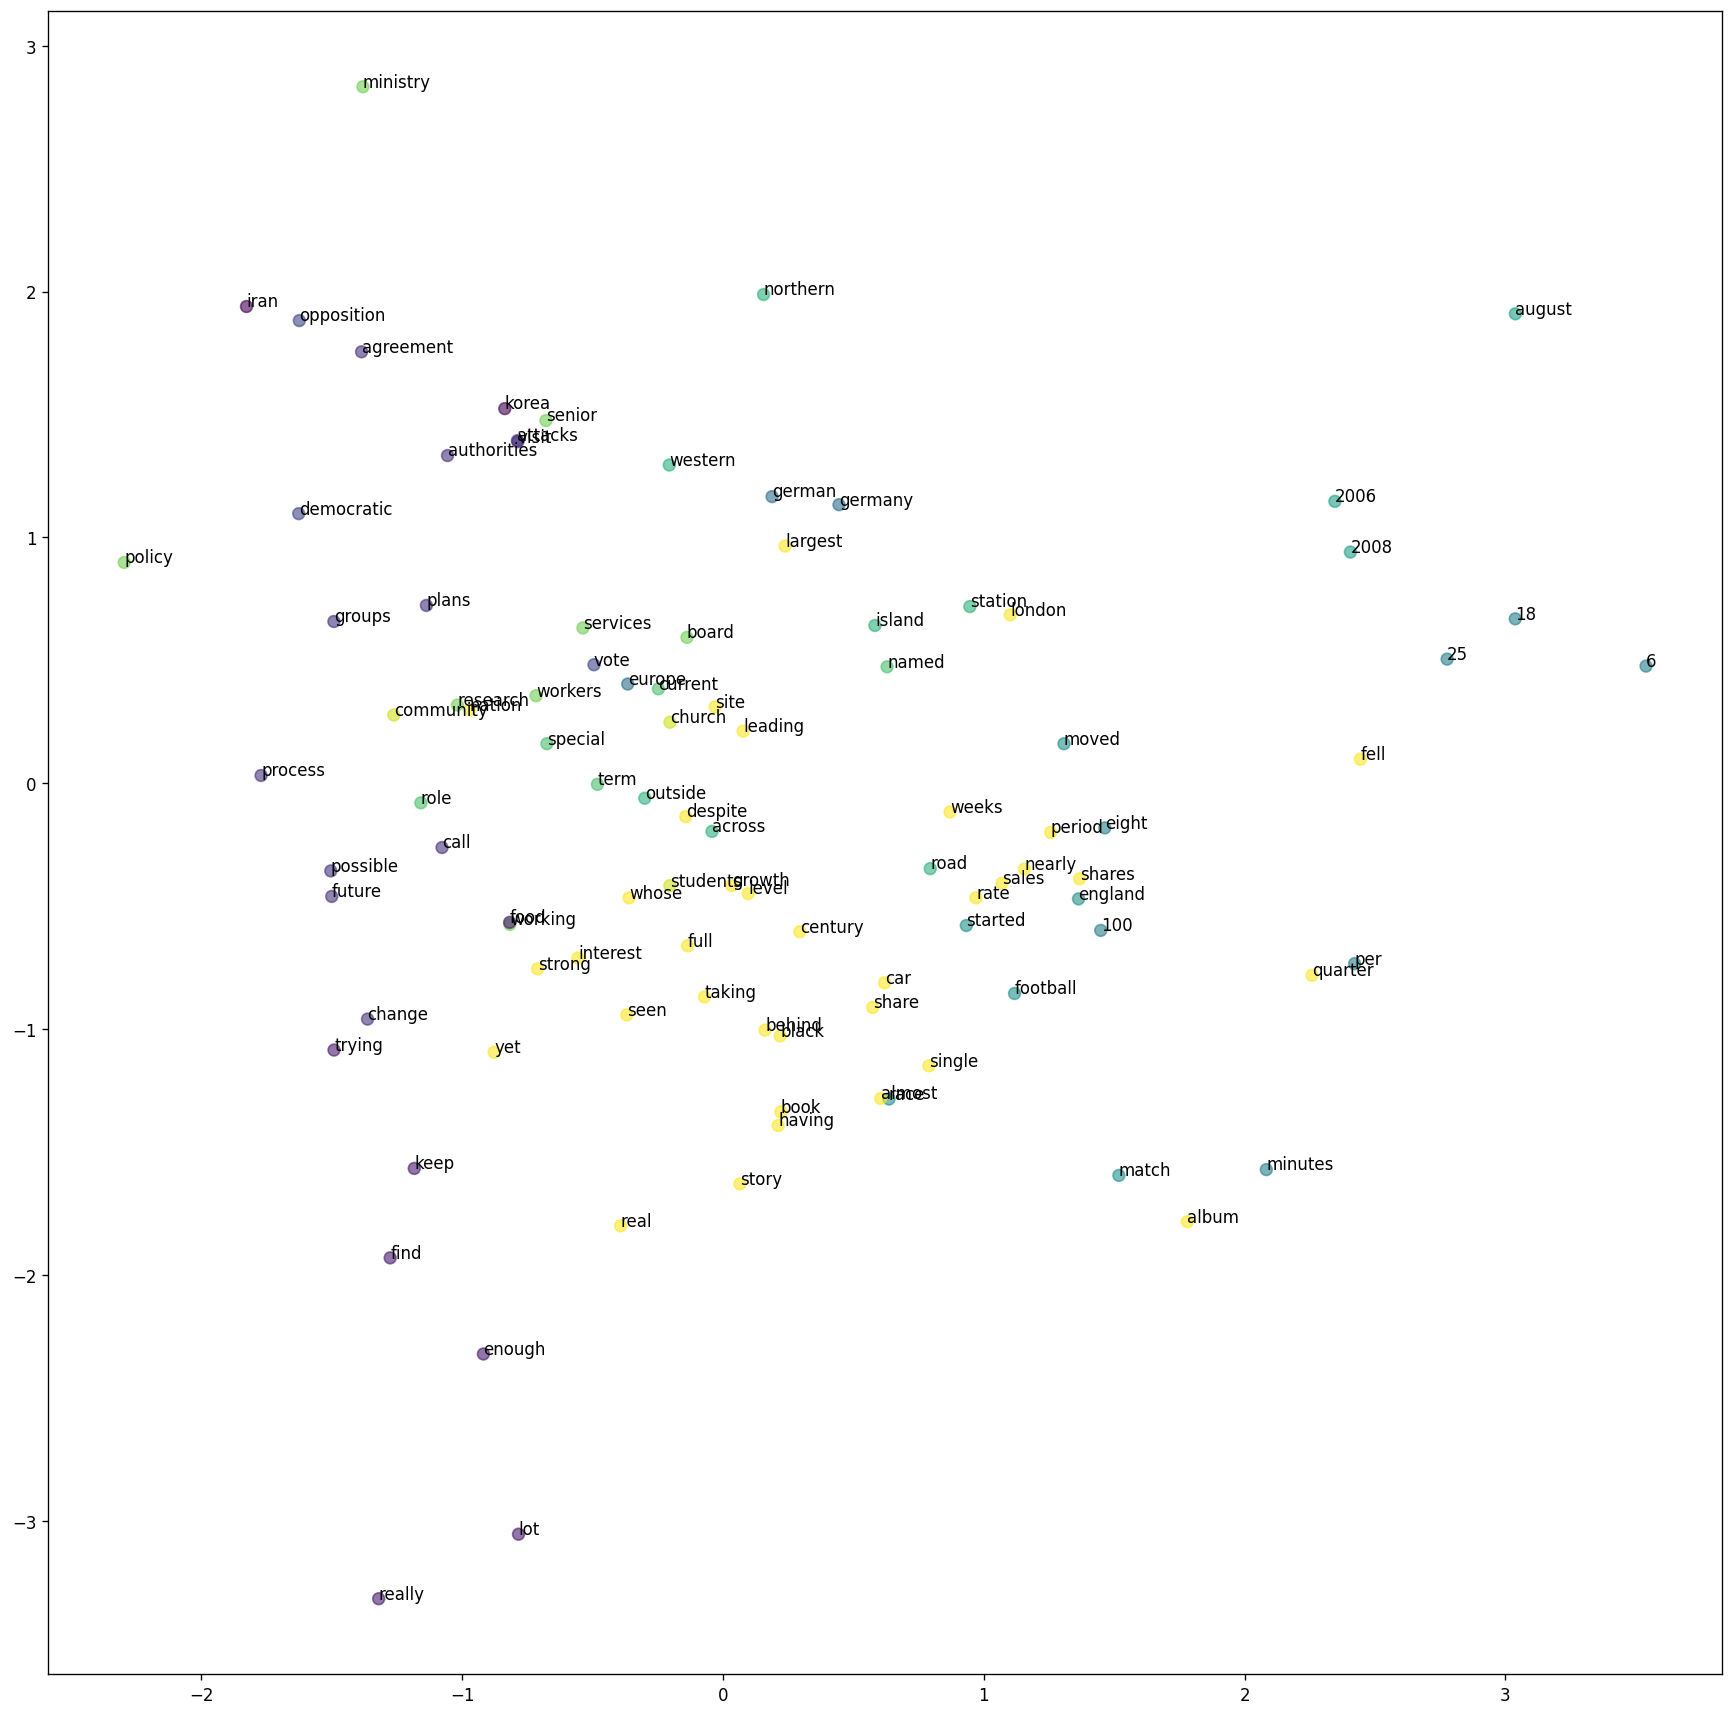

In [ ]:

# Extracting specific slices of the 2D vectors and corresponding labels and words for plotting

x=vectors_2d[200:500, 0]
y=vectors_2d[200:500, 1]
colors = labels[200:500]
words = glove_words[200:500]

# Create the plot with specified size and resolution
fig = plt.figure(figsize=(18, 18), dpi=120)
ax = fig.add_subplot(111)

# Scatter plot with color coding based on labels
sc = ax.scatter(x, y, c=colors, s=50, alpha=0.6)

# Add text annotations
for i, word in enumerate(words):
    ax.text(x[i], y[i], word, fontsize=10)

plt.show()

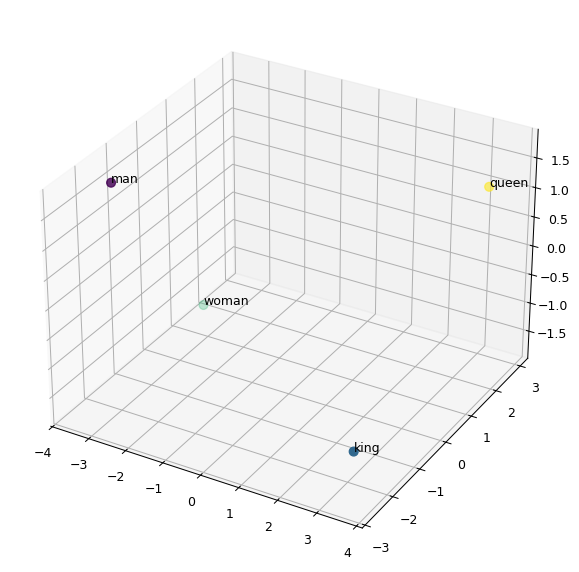

In [ ]:
from matplotlib import cm

# Define a list of words to visualize
words = ["man", "king", "woman", "queen"]

# Extract the corresponding vectors for these words from the GloVe embeddings
vectors = [glove_embedding[i] for i in words]

# Generate new labels for the selected words
new_labels = [labels[i] for i in range(len(glove_words)) if glove_words[i] in words]
# Perform PCA to reduce the dimensionality of the vectors to 3 components
pca = PCA(n_components=3)
vectors_3d = pca.fit_transform(vectors)

# Create a plot with specified size and resolution
fig = plt.figure(figsize=(10,8), dpi=90)
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the 3D vectors with color coding based on new labels
colors = cm.viridis(np.linspace(0, 1, len(words)))  # Generate distinct colors

ax.scatter(vectors_3d[:, 0], vectors_3d[:, 1], vectors_3d[:, 2], s=50, c=colors)

# Add text annotations for each point in the scatter plot
for i, word in enumerate(words):
    ax.text(vectors_3d[i, 0], vectors_3d[i, 1], vectors_3d[i, 2], word, fontsize=10)

plt.show()


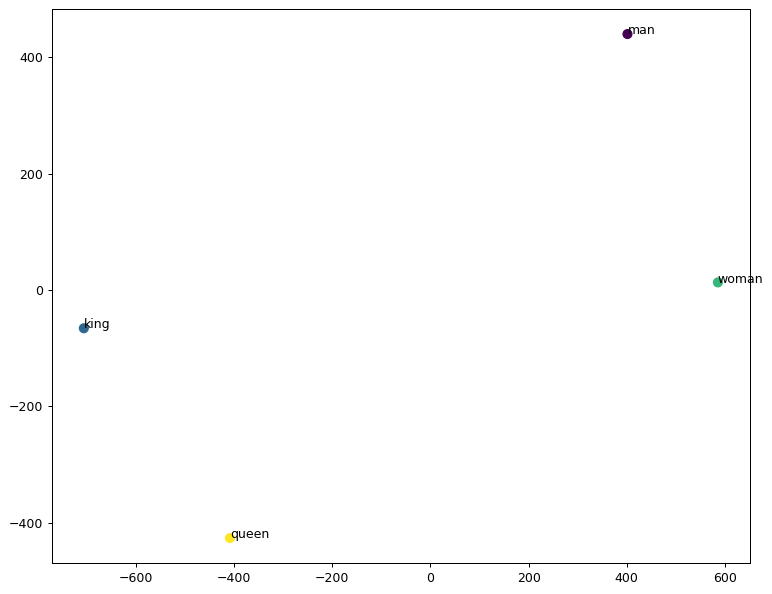

In [ ]:

# Define a list of words to visualize
words = ["man", "king", "woman", "queen"]

# Extract the corresponding vectors for these words from the GloVe embeddings and convert to numpy array
vectors = np.array([glove_embedding[i] for i in words])

# Generate new labels for the selected words
new_labels = [labels[i] for i in range(len(glove_words)) if glove_words[i] in words]

# Perform t-SNE to reduce the dimensionality of the vectors to 2 components
tsne = TSNE(n_components=2, perplexity=2)
vectors_2d = tsne.fit_transform(vectors)

# Create a plot with specified size and resolution
fig = plt.figure(figsize=(10,8), dpi=90)
ax = fig.add_subplot(111)

# Scatter plot of the 2D vectors with color coding based on new labels
ax.scatter(vectors_2d[:, 0], vectors_2d[:, 1], s=50, c=colors)

# Add text annotations for each point in the scatter plot
for i, word in enumerate(words):
    ax.text(vectors_2d[i, 0], vectors_2d[i, 1], word, fontsize=10)

plt.show()

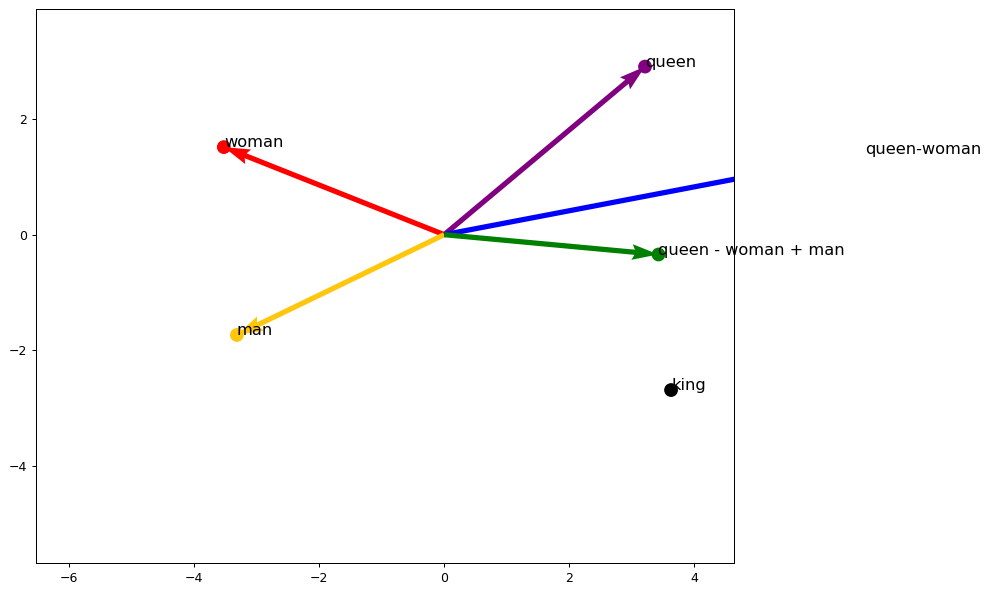

In [ ]:
# Define a list of words to visualize
words = ["man", "king", "woman", "queen"]

# Extract the corresponding vectors for these words from the GloVe embeddings and convert to numpy array
vectors = np.array([glove_embedding[i] for i in words])

# Define new labels with specific colors for each word
new_labels = ['#ffc60e', 'black', 'red', 'purple']

# Perform PCA to reduce the dimensionality of the vectors to 2 components
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)

# Create a plot with specified size and resolution
fig = plt.figure(figsize=(10, 8), dpi=90)
ax = fig.add_subplot(111)

# Scatter plot of the 2D vectors with color coding based on new labels
ax.scatter(vectors_2d[:, 0], vectors_2d[:, 1], s=100, c=new_labels)

# Add text annotations for each point in the scatter plot
for i, word in enumerate(words):
    ax.text(vectors_2d[i, 0], vectors_2d[i, 1], word, fontsize=13)

# Create a dictionary to store the 2D points for each word
points = {word: vectors_2d[i] for i, word in enumerate(words)}
queen_point = points['queen']
woman_point = points['woman']
man_point = points['man']

# Calculate the vector differences and additions
queen_woman = queen_point - woman_point
plus_man = queen_woman + man_point

# Plot the vectors using quiver with dotted lines
ax.quiver(0, 0, queen_point[0], queen_point[1], angles='xy', scale_units='xy', scale=1, color='purple', linestyle='dotted')
ax.quiver(0, 0, woman_point[0], woman_point[1], angles='xy', scale_units='xy', scale=1, color='red', linestyle='dotted')
ax.quiver(0, 0, man_point[0], man_point[1], angles='xy', scale_units='xy', scale=1, color='#ffc60e', linestyle='dotted')
ax.quiver(0, 0, queen_woman[0], queen_woman[1], angles='xy', scale_units='xy', scale=1, color='blue', linestyle='dotted')
ax.quiver(0, 0, plus_man[0], plus_man[1], angles='xy', scale_units='xy', scale=1, color='green', linestyle='dotted')

# Scatter and annotate the calculated points
ax.scatter(plus_man[0], plus_man[1], s=100, c='green')
ax.text(plus_man[0], plus_man[1], 'queen - woman + man', fontsize=13)
ax.scatter(queen_woman[0], queen_woman[1], s=100, c='blue')
ax.text(queen_woman[0], queen_woman[1], 'queen-woman', fontsize=13)

# Set the limits for the plot axes
ax.set_xlim(min(vectors_2d[:, 0]) - 3, max(vectors_2d[:, 0]) + 1)
ax.set_ylim(min(vectors_2d[:, 1]) - 3, max(vectors_2d[:, 1]) + 1)

plt.show()


## Word2Vec & FastText

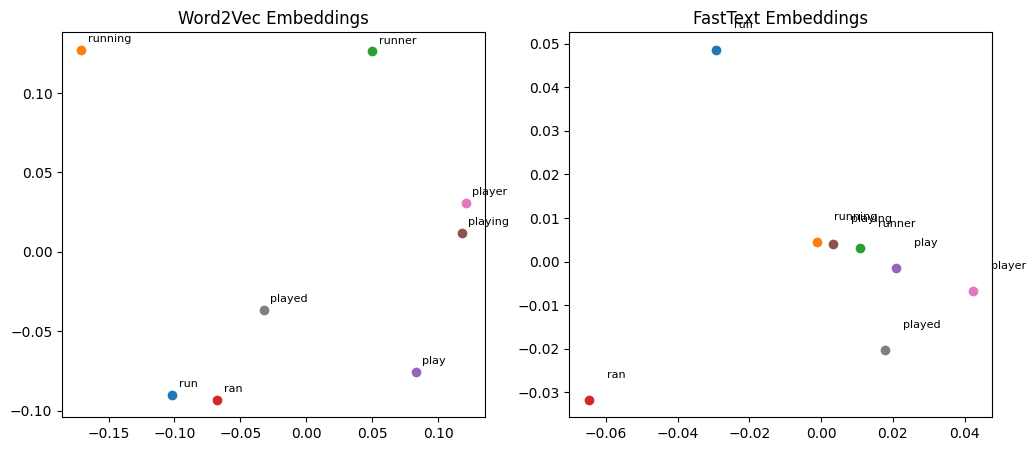

In [ ]:
from gensim.models import Word2Vec, FastText
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Sample corpus with morphological variations
sentences = [
    ["king", "queen", "man", "woman", "royal", "crown", "prince", "princess"],
    ["run", "running", "runner", "ran"],
    ["play", "playing", "player", "played"],
    ["eat", "eating", "eater", "ate"]
]

# Train Word2Vec
word2vec_model = Word2Vec(sentences, vector_size=10, window=3, min_count=1, workers=1)

# Train FastText
fasttext_model = FastText(sentences, vector_size=10, window=3, min_count=1, workers=1)

# Choose words to visualize
words = ["run", "running", "runner", "ran", "play", "playing", "player", "played"]
w2v_vectors = np.array([word2vec_model.wv[word] for word in words])
ft_vectors = np.array([fasttext_model.wv[word] for word in words])

# Reduce dimensions for visualization
pca = PCA(n_components=2)
w2v_2d = pca.fit_transform(w2v_vectors)
ft_2d = pca.fit_transform(ft_vectors)

# Plot function with subplots
def plot_embeddings(w2v_embeddings, ft_embeddings, words):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    for i, (embeddings, title, ax) in enumerate(zip(
        [w2v_embeddings, ft_embeddings],
        ["Word2Vec Embeddings", "FastText Embeddings"],
        axes
    )):
        for j, word in enumerate(words):
            x, y = embeddings[j]
            ax.scatter(x, y, label=word)
            ax.text(x + 0.005, y + 0.005, word, fontsize=8)
        ax.set_title(title)

    plt.show()

# Visualize embeddings
plot_embeddings(w2v_2d, ft_2d, words)

